<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/sound_processing0411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

- digital = sampling, *quantize*

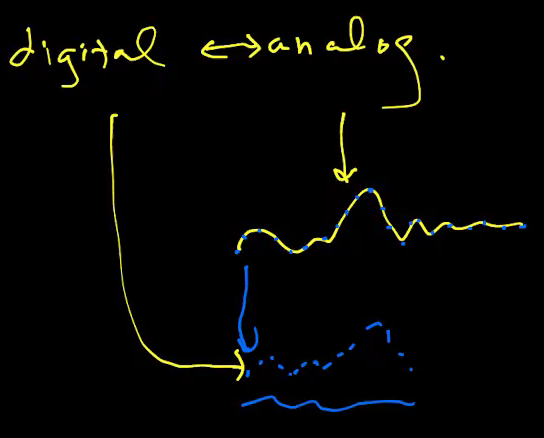

-sampling rate = 100hz : 1초를 100등분한다, 

초당 몇개의 값이 있는가
ex. 10000Hz, 1.5초 = 15000개의 값

-frequency = 7Hz : 초당 몇번의 반복이 있는가

-phasor = 주어진 조건(smplng rte,frqncy,ampltde,drtion)에 따라 사인 곡선을 만들어내는 것

fourier : 모든 signal은 여러가지 다양한 sine 곡선들의 결합으로 이루어져 있다

그래서 사인 곡선을 만드는 것은 중요함


signal = 시간의 함수

processing = 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [ ]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert sample to time (sec)
t = samples/sr

In [ ]:
# convert time to angle (radian)
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

In [ ]:
# plot the entire signal
plt.plot(t, s, ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
# plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
ipd.Audio(s, rate=10000)

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)

In [ ]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [ ]:
# generate samples
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert samples to time
t = samples/sr

In [ ]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by sin-phasor
c = amp * np.exp(theta*1j)

In [ ]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate=sr)

In [ ]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.imag, rate=sr)